<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Extract-the-temprature-data" data-toc-modified-id="Extract-the-temprature-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extract the temprature data</a></span></li><li><span><a href="#Choose-a-time-period-of-interest" data-toc-modified-id="Choose-a-time-period-of-interest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Choose a time period of interest</a></span></li><li><span><a href="#Calculate-the-total-rainfall-for-each-season-in-for-each-year" data-toc-modified-id="Calculate-the-total-rainfall-for-each-season-in-for-each-year-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculate the total rainfall for each season in for each year</a></span></li><li><span><a href="#Determine-the-climatology-for-each-season" data-toc-modified-id="Determine-the-climatology-for-each-season-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Determine the climatology for each season</a></span></li><li><span><a href="#Plot-Seasonal-Climatology" data-toc-modified-id="Plot-Seasonal-Climatology-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plot Seasonal Climatology</a></span></li></ul></div>

# Python Code Costumed for the Ethiopian Season

## Import Libraries 

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt         
from matplotlib.pylab import rcParams
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter 

## Load the data 

In [2]:
era5_ds = xr.open_dataset('era5_ecmwf_mon.nc')
era5_ds

<xarray.Dataset>
Dimensions:    (longitude: 61, latitude: 49, time: 60)
Coordinates:
  * longitude  (longitude) float32 33.0 33.25 33.5 33.75 ... 47.5 47.75 48.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... 3.75 3.5 3.25 3.0
  * time       (time) datetime64[ns] 2018-01-01T23:00:00 ... 2022-12-01T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-14 04:44:29 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

## Extract the temprature data 

In [3]:
lon = era5_ds['longitude'][:]
lat = era5_ds['latitude'][:]
nctime = era5_ds['time'][:]
t2m    = era5_ds['t2m'][:]

In [4]:
t2m

<xarray.DataArray 't2m' (time: 60, latitude: 49, longitude: 61)>
[179340 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 33.0 33.25 33.5 33.75 ... 47.5 47.75 48.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... 3.75 3.5 3.25 3.0
  * time       (time) datetime64[ns] 2018-01-01T23:00:00 ... 2022-12-01T23:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

## Choose a time period of interest

In [5]:
# Choose a time period of interest ranging from October 2018 to January 2022.
t2m_oct_2018_jan_2022 =  t2m.sel(time=slice('2018-10','2022-01'))

In [6]:
t2m_oct_2018_jan_2022

<xarray.DataArray 't2m' (time: 40, latitude: 49, longitude: 61)>
[119560 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 33.0 33.25 33.5 33.75 ... 47.5 47.75 48.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... 3.75 3.5 3.25 3.0
  * time       (time) datetime64[ns] 2018-10-01T23:00:00 ... 2022-01-01T23:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

## Calculate the total rainfall for each season in for each year 

In [7]:
# Calculate the total rainfall for each season in for each year 
Oct2018_Jan2019  = t2m_oct_2018_jan_2022.sel(time=slice('2018-10', '2019-01')).mean('time')
Feb_May2019 = t2m_oct_2018_jan_2022.sel(time=slice('2019-02', '2019-05')).mean('time')
Jun_Sep2019 = t2m_oct_2018_jan_2022.sel(time=slice('2019-06', '2019-09')).mean('time')
Oct2019_Jan2020 = t2m_oct_2018_jan_2022.sel(time=slice('2019-10', '2020-01')).mean('time')
Feb_May2020 = t2m_oct_2018_jan_2022.sel(time=slice('2020-02', '2020-05')).mean('time')
Jun_Sep2020 = t2m_oct_2018_jan_2022.sel(time=slice('2020-06', '2020-09')).mean('time')
Oct2020_Jan2021 = t2m_oct_2018_jan_2022.sel(time=slice('2020-10', '2021-01')).mean('time')
Feb_May2021 = t2m_oct_2018_jan_2022.sel(time=slice('2021-02', '2021-05')).mean('time')
Jun_Sep2021 = t2m_oct_2018_jan_2022.sel(time=slice('2021-06', '2021-09')).mean('time')
Oct2021_Jan2022 = t2m_oct_2018_jan_2022.sel(time=slice('2021-10', '2022-01')).mean('time')

## Determine the climatology for each season

In [8]:
ONDJ_Clm  = (Oct2018_Jan2019 + Oct2019_Jan2020 + Oct2020_Jan2021 + Oct2021_Jan2022)/4
FMAM_Clm = (Feb_May2019 + Feb_May2020 + Feb_May2021)/3
JJAS_Clm = (Jun_Sep2019 + Jun_Sep2020 + Jun_Sep2021)/3

## Plot Seasonal Climatology

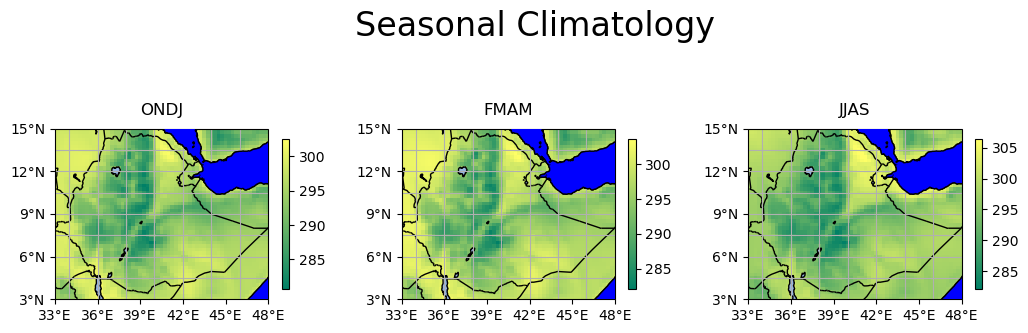

In [9]:
plt.figure(figsize=(12, 8))

plt.rcParams['axes.titlesize'] =12
plt.rcParams['axes.titlepad'] =10

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.5)

plt.suptitle("Seasonal Climatology",  fontsize=24)

lon2d, lat2d = np.meshgrid(ONDJ_Clm.longitude,ONDJ_Clm.latitude)  

extent = [33, 48, 3, 15]
central_lon, central_lat = 37,7

ax1 = plt.subplot(1,3,1, projection=ccrs.PlateCarree(central_longitude=central_lon, globe=None))
ct1 = ax1.pcolormesh(lon2d, lat2d, ONDJ_Clm, 
                     transform=ccrs.PlateCarree(), cmap='summer')
ax1.add_feature(cfeature.OCEAN, zorder=100, edgecolor='k', facecolor='blue')
ax1.add_feature(cfeature.BORDERS, edgecolor='black')
ax1.add_feature(cfeature.LAKES, edgecolor='black')
ax1.coastlines(resolution='10m')
ax1.set_extent(extent)
ax1.gridlines()
ax1.set_xticks(np.arange(33,49,3), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(3,16,3), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
cb = plt.colorbar(ct1 ,orientation="vertical",extendrect='True', shrink = 0.15)
ax1.set(title="ONDJ")
        
ax2 = plt.subplot(1,3,2, projection=ccrs.PlateCarree(central_longitude=central_lon, globe=None))
ct2 = ax2.pcolormesh(lon2d, lat2d, FMAM_Clm,
                     transform=ccrs.PlateCarree(), cmap='summer')
ax2.add_feature(cfeature.OCEAN, zorder=100, edgecolor='k', facecolor='blue')
ax2.add_feature(cfeature.BORDERS, edgecolor='black')
ax2.add_feature(cfeature.LAKES, edgecolor='black')
ax2.coastlines(resolution='10m')
ax2.set_extent(extent)
ax2.gridlines()
ax2.set_xticks(np.arange(33,49,3), crs=ccrs.PlateCarree())
ax2.set_yticks(np.arange(3,16,3), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
cb = plt.colorbar(ct2 ,orientation="vertical",extendrect='True', shrink = 0.15)
#cb.set_label("K", fontsize=12)
ax2.set(title="FMAM")

ax3 = plt.subplot(1,3,3, projection=ccrs.PlateCarree(central_longitude=central_lon, globe=None))
ct3 = ax3.pcolormesh(lon2d, lat2d, JJAS_Clm, 
                     transform=ccrs.PlateCarree(), cmap='summer')
ax3.add_feature(cfeature.OCEAN, zorder=100, edgecolor='k', facecolor='blue')
ax3.add_feature(cfeature.BORDERS, edgecolor='black')
ax3.add_feature(cfeature.LAKES, edgecolor='black')
ax3.coastlines(resolution='10m')
ax3.set_extent(extent)
ax3.gridlines()
ax3.set_xticks(np.arange(33,49,3), crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(3,16,3), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
cb = plt.colorbar(ct3 ,orientation="vertical",extendrect='True', shrink = 0.15)
# cb.set_label("K", fontsize=12)
ax3.set(title="JJAS")


plt.subplots_adjust(top=1.35)
#plt.savefig('sub.jpeg', transparent=True,  bbox_inches='tight', dpi=800)
plt.show()
